In [449]:
from Bio import SeqIO
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.SeqUtils import GC

In [511]:
'''
First task - make class  of some subject with constructor and two methods 
'''
# class - student that have age, energy ... 
class Student:
    '''
    age - age of student
    energy - in percent, how he fells
    weight - kg
    height - cm
    energetic - does the student drink coffee or energetic
    '''
    def __init__(self, age, energy, weight, height, energetic = False):
        self.energy = energy
        self.energetic = energetic
        self.weight = weight
        self.height = height
        self.age = age
        
        
    def pass_exam(self):
        # I found new formula for student, that can predict pass of the exam by student
        # Returs False or True
        ph = (1/self.age) * self.energy
        if self.energetic:
            ph = ph * 1.2
        
        return ph > 5.3
    
    def bmi(self):
        # Calculate BMI for student
        return self.weight/self.height

In [512]:
test_student = Student(30, 80, 180, 80)
test_student.pass_exam()
test_student.bmi()

2.25

In [110]:
'''
Second task - class that takes RNA seq, and have several methods: 1. Return aminoacids that trs from RNA
2. Reverse transcription from RNA to DNA
'''
# STANDART IUPAC CODE
translate = {"UUU" : "F", "CUU" : "L", "AUU" : "I", "GUU" : "V",
           "UUC" : "F", "CUC" : "L", "AUC" : "I", "GUC" : "V",
           "UUA" : "L", "CUA" : "L", "AUA" : "I", "GUA" : "V",
           "UUG" : "L", "CUG" : "L", "AUG" : "M", "GUG" : "V",
           "UCU" : "S", "CCU" : "P", "ACU" : "T", "GCU" : "A",
           "UCC" : "S", "CCC" : "P", "ACC" : "T", "GCC" : "A",
           "UCA" : "S", "CCA" : "P", "ACA" : "T", "GCA" : "A",
           "UCG" : "S", "CCG" : "P", "ACG" : "T", "GCG" : "A",
           "UAU" : "Y", "CAU" : "H", "AAU" : "N", "GAU" : "D",
           "UAC" : "Y", "CAC" : "H", "AAC" : "N", "GAC" : "D",
           "UAA" : "STOP", "CAA" : "Q", "AAA" : "K", "GAA" : "E",
           "UAG" : "STOP", "CAG" : "Q", "AAG" : "K", "GAG" : "E",
           "UGU" : "C", "CGU" : "R", "AGU" : "S", "GGU" : "G",
           "UGC" : "C", "CGC" : "R", "AGC" : "S", "GGC" : "G",
           "UGA" : "STOP", "CGA" : "R", "AGA" : "R", "GGA" : "G",
           "UGG" : "W", "CGG" : "R", "AGG" : "R", "GGG" : "G" 
           }


class RNA(Seq):
    
    def __init__(self, seq = ''):
        self.seq = seq.upper()
        
    def translation(self):
    # wasn't mentioned which strain, aut = 5' - 3'
        protein = []
        for codon_id in range(0, len(self.seq),3):
            codon = self.seq[codon_id:codon_id+3]
            if codon not in translate:
                print('Given not standart RNA')
                return ''
            elif translate[codon] == 'STOP':
                break
            else:
                protein.append(translate[codon])
        return ''.join(protein)
    
    def reverse_transcription(self):
        dna = []
        for nuc in self.seq:
            if nuc == 'A':
                dna.append('T')
            elif nuc == 'U':
                dna.append('A')
            elif nuc == 'G':
                dna.append('C')
            elif nuc == 'C':
                dna.append('G')
        return ''.join(dna)
        
    def complement(self):
        compl = []
        for nuc in self.seq:
            if nuc == 'A':
                compl.append('U')
            elif nuc == 'U':
                compl.append('A')
            elif nuc == 'G':
                compl.append('C')
            elif nuc == 'C':
                compl.append('G')
        return ''.join(compl)
        

In [424]:
# test class RNA
rna = RNA('UUUCCUCCGUAUCAUCAUCAUACUACUAAAUAA')
print(rna.reverse_transcription())
print(rna.translation())
print(rna.complement())

AAAGGAGGCATAGTAGTAGTATGATGATTTATT
FPPYHHHTTK
AAAGGAGGCAUAGUAGUAGUAUGAUGAUUUAUU


In [425]:
'''
Third task make class from set that contains only positive num and can add only positive num
'''
class Positive(set):
    def __init__(self, in_set):
        for elem in in_set:
            self.add(elem)
    def add(self, value):
        if value > 0:
            super().add(value)

In [249]:
# TESTING
a = Positive({1,2,3,4, -5,-8})
print(a)
a.add(-5)
print(a)
a.add(8)
print(a)

Positive({1, 2, 3, 4})
Positive({1, 2, 3, 4})
Positive({1, 2, 3, 4, 8})


In [497]:
'''
Class - input: path to fasta, methods: 1. Num of seq in fasta 2. Plot hist distr of length 3. GC content
4. Freq hist of 4-mer 5. Переопределение метода для вывода информации при принте 
6. Выполнение всех реализованных методов по подсчёту метрик 7. Additional metrics
'''
class Fasta_analyse:
    
    def __init__(self, path = ''):
        self.path = path
    
    def destribution_length_plot(self):
        records_len = [len(rec) for rec in SeqIO.parse(self.path, "fasta")]
        len_plot = sns.histplot(records_len, color = 'gold')
        len_plot.set(xlabel='Length Destribution', title = 'Destribution of length along fasta file')
        plt.show()
        
    def get_num_of_seq(self):
        num_of_seq = 0
        with open(self.path, 'r') as fasta:
            for line in fasta:
                if line.startswith('>'):
                    num_of_seq +=1
        return num_of_seq
    
    def GC_content(self):
        
        gc_cont = [GC(rec.seq) for rec in SeqIO.parse(self.path, "fasta")]
        
        return sum(gc_cont) / len(gc_cont)
    
    def count_k_mer(self):
        k_mers = {}
        with open(self.path,'r') as fasta:
            for f_r in SeqIO.parse(fasta, 'fasta'):
                len_seq = len(f_r.seq)
                for i in range(len_seq - 4 + 1):
                    kmer = f_r.seq.__str__()[i: i + 4]
                    try:
                        k_mers[kmer] += 1
                    except KeyError:
                        k_mers[kmer] = 1
        
        plt.figure(figsize=(10,10))
        sns.barplot(x=list(k_mers.values()), y=list(k_mers.keys()), color='#9e9fdd')
        plt.yticks(fontsize=4)
        plt.show()
    
    def __repr__(self):
        
        return self.path
        
    def metrics_all(self):
        
        return self.GC_content(), self.get_num_of_seq()
    

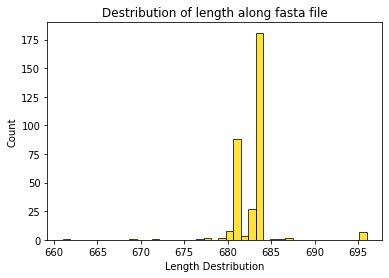

326
42.13430506945594


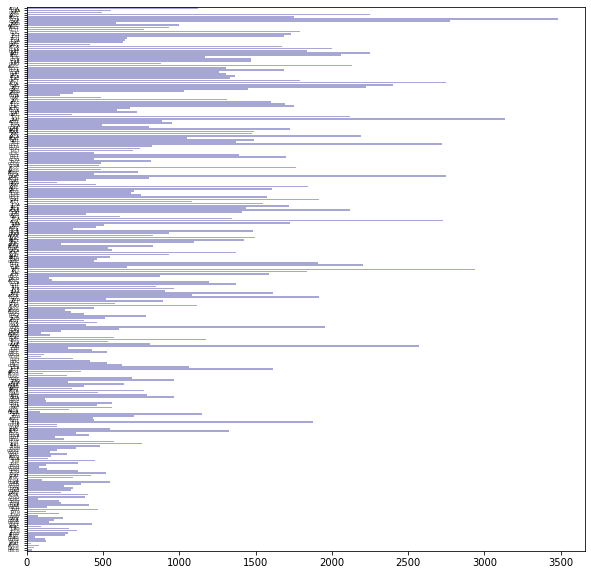

None
(42.13430506945594, 326)


In [498]:
ff = Fasta_analyse('ATP6.fasta')      
ff.destribution_length_plot()
print(ff.get_num_of_seq())
print(ff.GC_content())
print(ff.count_k_mer())
print(ff.metrics_all())